In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- 1. 设置模拟参数 ---
# 空间网格点数
N = 41
# 模拟的总时长
T_end = 1.0
# 粘度系数
nu = 0.1
# 时间步长
dt = 0.005
# 空间网格的长度
L = 10.0
# 空间步长
dx = L / (N - 1)
# 总的时间步数
num_steps = int(T_end / dt)

In [3]:
# --- 2. 初始化网格和初始条件 ---
# 创建空间网格
x = np.linspace(0, L, N)
# 创建初始速度场 u
# 初始条件: u(x, 0) = sin(pi * x)
u = np.sin(np.pi * x)
# 创建一个列表来存储不同时间点的速度场，用于绘图
solutions = [u.copy()]

In [5]:
# --- 3. 主循环: 时间步进 ---
print("开始计算...")
for n in range(num_steps):
    # 创建一个临时数组，存储下一个时间步的解
    u_new = u.copy()
    
    # 遍历所有内部网格点 (i=1 到 N-2)
    for i in range(1, N - 1):
        # 这是有限差分法的核心，实现迭代公式
        # 注意: np.diff() 等函数可以简化，但这里我们使用最基础的循环
        
        # 对流项 (非线性项)
        convection_term = u[i] * (u[i+1] - u[i-1]) / (2 * dx)
        
        # 扩散项 (粘性项)
        diffusion_term = nu * (u[i+1] - 2 * u[i] + u[i-1]) / (dx**2)
        
        # 应用迭代公式计算下一个时间步的解
        u_new[i] = u[i] - dt * convection_term + dt * diffusion_term
    
     # --- 4. 设置边界条件 ---
    # 这里我们使用固定边界条件，u 在两端始终为 0
    u_new[0] = 0
    u_new[-1] = 0
    # 将新计算的解赋值给 u，准备进入下一个时间步
    u = u_new
    # 每隔一定步数保存一次结果，用于绘图
    if (n + 1) % 50 == 0:
        solutions.append(u.copy())
print("计算完成。")

开始计算...
计算完成。


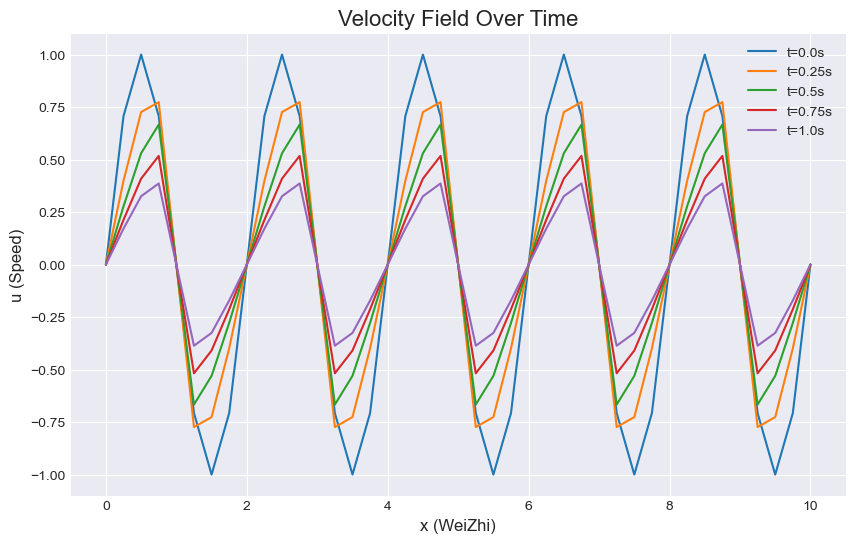

In [8]:
# --- 5. 可视化结果 ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))

for sol in solutions:
    plt.plot(x, sol)
plt.title('Velocity Field Over Time', fontsize=16)
plt.xlabel('x (WeiZhi)', fontsize=12)
plt.ylabel('u (Speed)', fontsize=12)
plt.legend([f't={round(i*50*dt, 2)}s' for i in range(len(solutions))])
plt.show()
